# House price prediction using ML algorithms


In [1]:
# importing libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# read dataset

df = pd.read_csv("P:\Artificial Intelligence\Machine Learning\Dataset\home-data-for-ml-course\\train.csv")

In [3]:
# to display all rows & cols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
# to display null values count in dataset
df.isnull().sum().sum()

6965

In [7]:
# to display null value percentage
null_val_p = df.isnull().mean()*100
null_val_p

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

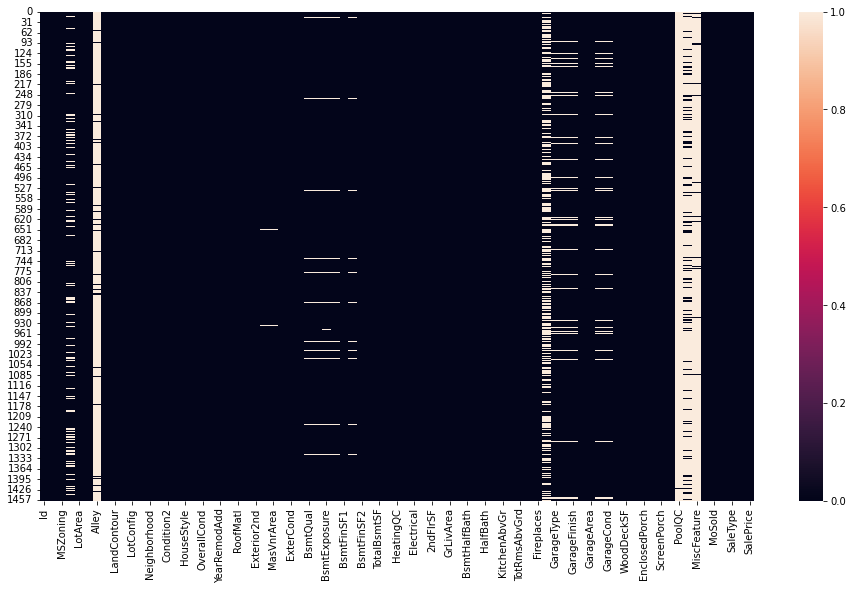

In [8]:
# to show null values using heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# to search features which has more null values

null_val_id = null_val_p[null_val_p > 17].keys()
null_val_id

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
# to drop columns which has higher ull values

df2 = df.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'])
df2.shape

(1460, 75)

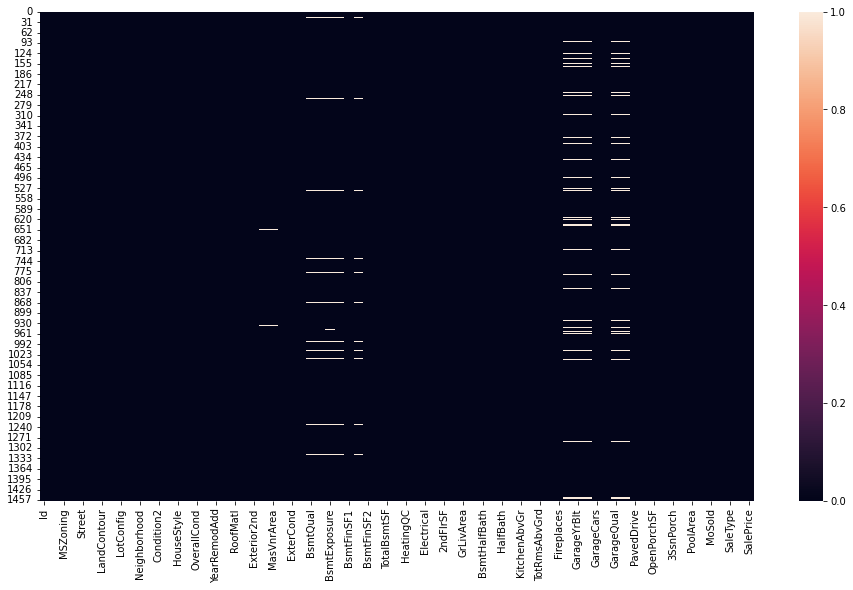

In [11]:
# to show null values after droping cols using heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df2.isnull())
plt.show()

In [12]:
# to separate numerical valued features and categorical valued features

num_val_cols = df2.select_dtypes(include=['int64', 'float64']).columns
print(num_val_cols, '\n')

cat_val_cols = df2.select_dtypes(include=['object']).columns
print(cat_val_cols, end='')

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAi

In [13]:
cat_val_cols_df = df2.select_dtypes(include=['object'])
cat_val_cols_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
for var in cat_val_cols:
    print(cat_val_cols_df[var].value_counts())



RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [15]:
# selecting null numerical valued features

null_num_val_col = [var for var in num_val_cols if df2[var].isnull().sum() > 0]
print(null_num_val_col)

['MasVnrArea', 'GarageYrBlt']


In [16]:
# selecting null categorical valued features

null_cat_val_col = [var for var in cat_val_cols if df2[var].isnull().sum() > 0]
print(null_cat_val_col)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [17]:
# filling missing values

imputer = SimpleImputer(strategy='mean')

In [18]:
df2[num_val_cols] = imputer.fit_transform(df2[num_val_cols])

In [19]:
df2[num_val_cols].shape

(1460, 37)

In [20]:
df2[num_val_cols].isnull().sum().sum()

0

In [21]:
df2.isnull().sum().sum()

520

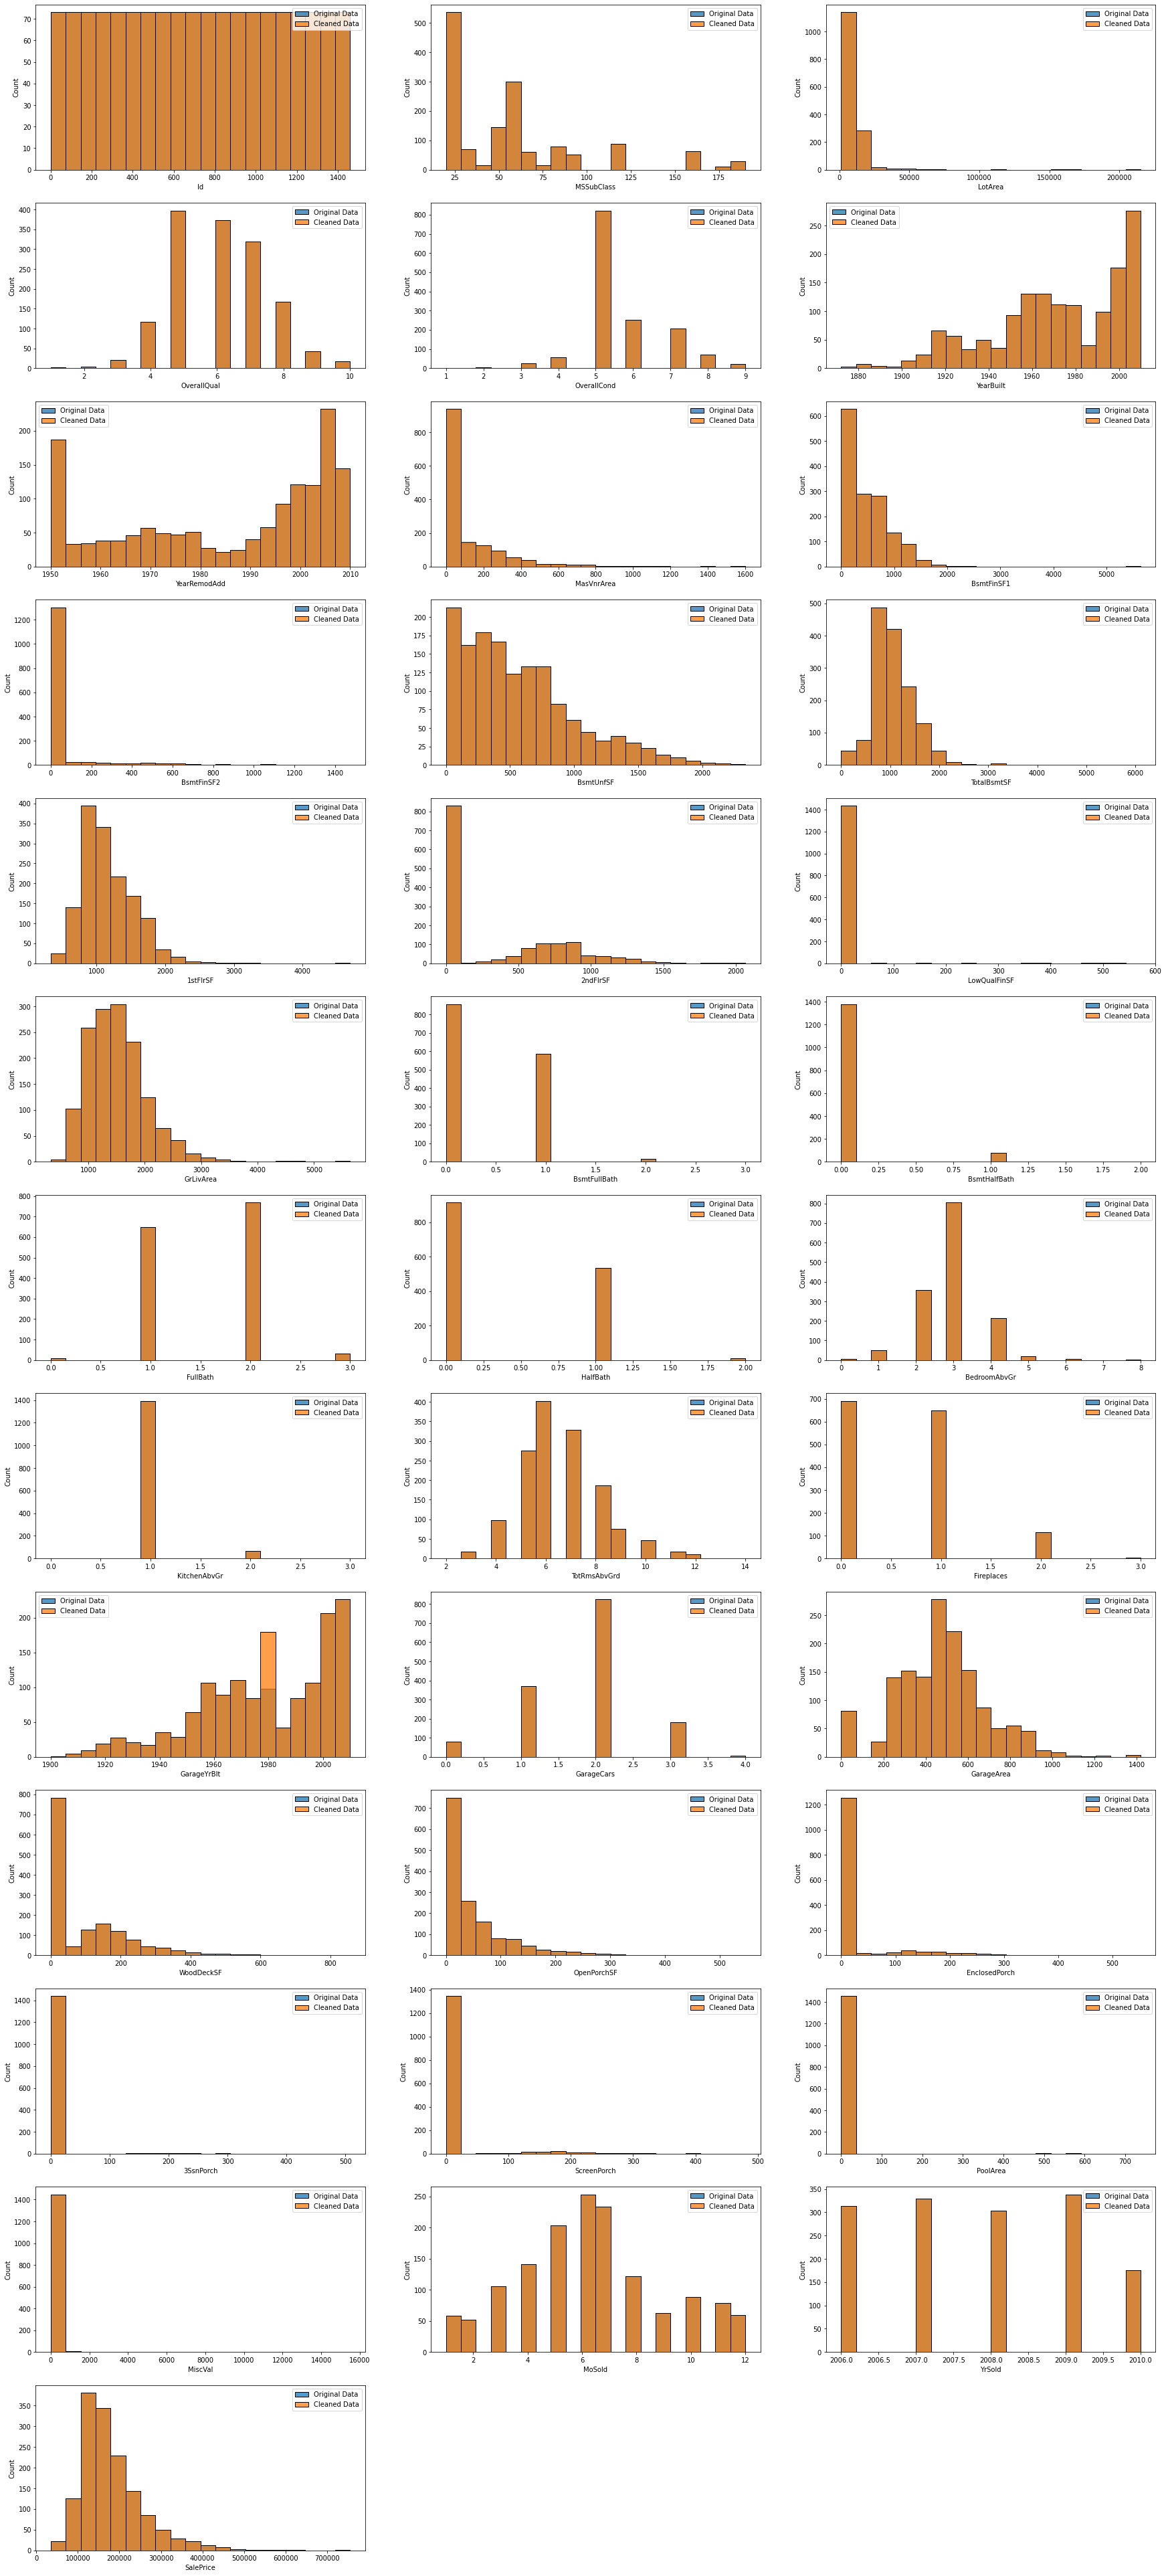

In [26]:
plt.figure(figsize=(30, 70))

for i , var in enumerate(num_val_cols):
    plt.subplot(13,3,i+1)
    sns.histplot(df[var], bins=20, label = "Original Data")
    sns.histplot(df2[var], bins=20, label = "Cleaned Data")
    plt.legend()

plt.show()

In [27]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [28]:
df2[cat_val_cols] = cat_imputer.fit_transform(df2[cat_val_cols])


In [29]:
df2[cat_val_cols].shape

(1460, 38)

In [30]:
df2[cat_val_cols].isnull().sum().sum()

0

In [33]:
def cat_val_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0]*100,
                      df2[var].value_counts()/df2.shape[0]*100], axis=1,
                      keys = ['Original', 'Cleaned'])

for i, var1 in enumerate(cat_val_cols):
    values = cat_val_dist(var1)
    print(values, "\n")

          Original    Cleaned
RL       78.835616  78.835616
RM       14.931507  14.931507
FV        4.452055   4.452055
RH        1.095890   1.095890
C (all)   0.684932   0.684932 

       Original    Cleaned
Pave  99.589041  99.589041
Grvl   0.410959   0.410959 

      Original    Cleaned
Reg  63.356164  63.356164
IR1  33.150685  33.150685
IR2   2.808219   2.808219
IR3   0.684932   0.684932 

      Original    Cleaned
Lvl  89.794521  89.794521
Bnk   4.315068   4.315068
HLS   3.424658   3.424658
Low   2.465753   2.465753 

         Original    Cleaned
AllPub  99.931507  99.931507
NoSeWa   0.068493   0.068493 

          Original    Cleaned
Inside   72.054795  72.054795
Corner   18.013699  18.013699
CulDSac   6.438356   6.438356
FR2       3.219178   3.219178
FR3       0.273973   0.273973 

      Original    Cleaned
Gtl  94.657534  94.657534
Mod   4.452055   4.452055
Sev   0.890411   0.890411 

          Original    Cleaned
NAmes    15.410959  15.410959
CollgCr  10.273973  10.273973
OldT

In [34]:
df2.isnull().sum().sum()

0

In [35]:
df2.shape

(1460, 75)

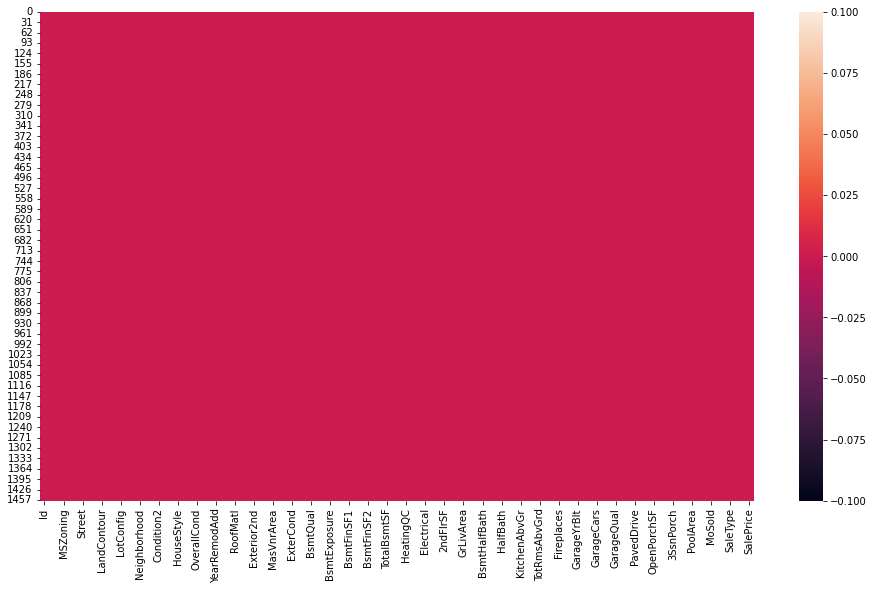

In [36]:
# to show null values using after filling missing values heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df2.isnull())
plt.show()

In [129]:
# final_df = df2.drop(columns=['MSZoning', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive'])
# final_df.shape

In [130]:
# lst2 = ['MSZoning', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive']

In [37]:
# converting categorical values into numerical values

label_enc = LabelEncoder()

for var in df2:
    if df2[var].dtype == 'object':
        df2[var] = label_enc.fit_transform(df2[var])

In [38]:
df2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


In [39]:
df2.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,1.762329,103.685262,2.539726,3.733562,1.396575,2.280137,2.817123,2.284247,2.789726,443.639726,4.715753,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,3.682192,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,2.208219,1978.506164,1.228767,1.767123,472.980137,3.871918,3.905479,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.614274,180.569112,0.693995,0.731807,0.722394,0.864510,0.650919,1.138472,1.837550,456.098091,0.925252,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,1.051301,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,1.759864,23.994583,0.811835,0.747315,213.804841,0.594151,0.508297,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.0

In [40]:
# splitting data for training & testing

f_class = df2.drop(columns=['Id', 'SalePrice'])
t_class = df2['SalePrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(f_class, t_class, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 73) (292, 73) (1168,) (292,)


In [43]:
# feature scaling of training data

from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()

In [44]:
X_train = std_sc.fit_transform(X_train)
X_test = std_sc.transform(X_test)

In [45]:
X_train

array([[-0.8667643 , -0.05479609, -0.21289571, ...,  1.65006527,
         0.31666197,  0.20177167],
       [ 0.07410996, -0.05479609, -0.26524463, ...,  0.89367742,
         0.31666197,  0.20177167],
       [-0.63154574, -0.05479609, -0.17784146, ...,  0.13728958,
         0.31666197,  0.20177167],
       ...,
       [-0.8667643 , -0.05479609, -0.23409563, ..., -1.37548612,
         0.31666197,  0.20177167],
       [-0.16110861, -0.05479609, -0.28337613, ..., -0.61909827,
         0.31666197,  0.20177167],
       [ 1.48542135, -0.05479609, -0.65139925, ...,  0.89367742,
         0.31666197,  0.20177167]])

In [46]:
# applying linear regression model

line_reg = LinearRegression()
fit_lr_model = line_reg.fit(X_train, y_train)
lr_accuracy = fit_lr_model.score(X_test, y_test)
lr_accuracy

0.8521481019644723

In [49]:
y_pred = fit_lr_model.predict(X_test)

In [47]:
print(fit_lr_model.intercept_, '\n')
print(fit_lr_model.coef_)

181441.26522586498 

[-5.55669782e+03 -1.17801409e+03  2.86588613e+03  1.07529005e+03
 -1.77737414e+03  2.66842985e+03 -1.39040227e+03  4.56153259e+02
  3.41582343e+03  2.52123932e+03 -5.40232322e+01 -2.32171929e+03
 -1.36643310e+03 -2.90738118e+03  1.59940665e+04  4.83222536e+03
  5.33430163e+03  1.68543714e+03  2.40145162e+03  2.10374649e+03
 -3.91030024e+03  1.72585066e+03  2.58622764e+03  4.07687818e+03
 -5.03898722e+03 -1.00913401e+02  9.11184906e+02 -8.47132834e+03
  2.33393341e+03 -4.05981789e+03 -1.62133003e+03 -1.91970309e+15
  8.39837816e+02 -6.61620180e+14 -1.86656846e+15  1.84278196e+15
 -4.51375000e+02 -4.55468750e+02  2.78750000e+02 -4.35437500e+02
 -1.18695552e+16 -1.34932621e+16 -1.46996380e+15  1.60982179e+16
  4.81531250e+03 -1.18125000e+01  1.86168750e+03 -2.09539062e+02
 -2.15915625e+03 -2.77918750e+03 -7.78065625e+03  5.29575000e+03
  4.41006250e+03  3.53556250e+03 -8.72437500e+02 -1.22031250e+02
  4.48656250e+02  8.47718750e+03 -7.13000000e+02 -3.74843750e+02
  1.

In [50]:
# finding errors

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

mse = mean_squared_error(y_test, y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

21341.415104266343
1134072288.2842662
33675.989789229156


In [52]:
# Applying polynomial linear regression

poly_reg = PolynomialFeatures(degree=1)

In [53]:
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [54]:
X_train_poly.shape, X_test_poly.shape

((1168, 74), (292, 74))

In [55]:
lr = LinearRegression()
fit_plr_model = lr.fit(X_train_poly, y_train)
fit_plr_model.score(X_test_poly, y_test)

0.852016850232894

In [56]:
y_pred2 = fit_plr_model.predict(X_test_poly)


In [72]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=51)
fit_dtr_model = dtr.fit(X_train, y_train)
y_pred3 = fit_dtr_model.predict(X_test)
fit_dtr_model.score(X_test, y_test)


0.7584331175863704

In [102]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=95, random_state=42)
fit_rfr_model = rfr.fit(X_train, y_train)
y_pred4 = fit_rfr_model.predict(X_test)
fit_rfr_model.score(X_test, y_test)

0.9016795995380166

In [103]:
# finding errors of model

from sklearn.metrics import mean_absolute_error, mean_squared_error

#1 for linear regression
print('Linear Regression')
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squarred Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squarred Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', fit_lr_model.score(X_test, y_test)*100, '\n')

#2 for Polynomial linear regression
print('Polynomial Linear Regression')
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred2))
print('Mean Squarred Error: ', mean_squared_error(y_test, y_pred2))
print('Root Mean Squarred Error: ', np.sqrt(mean_squared_error(y_test, y_pred2)))
print('Accuracy:', fit_plr_model.score(X_test_poly, y_test)*100, '\n')

#3 for Decision Tree
print('Decision Tree Regressor')
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred3))
print('Mean Squarred Error: ', mean_squared_error(y_test, y_pred3))
print('Root Mean Squarred Error: ', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('Accuracy:', fit_dtr_model.score(X_test, y_test)*100, '\n')

#2 for Random Forest
print('Random Forest Regressor')
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred4))
print('Mean Squarred Error: ', mean_squared_error(y_test, y_pred4))
print('Root Mean Squarred Error: ', np.sqrt(mean_squared_error(y_test, y_pred4)))
print('Accuracy:', fit_rfr_model.score(X_test, y_test)*100)

Linear Regression
Mean Absolute Error:  21341.415104266343
Mean Squarred Error:  1134072288.2842662
Root Mean Squarred Error:  33675.989789229156
Accuracy: 85.21481019644723 

Polynomial Linear Regression
Mean Absolute Error:  21355.394163366866
Mean Squarred Error:  1135079031.880731
Root Mean Squarred Error:  33690.93397162998
Accuracy: 85.2016850232894 

Decision Tree Regressor
Mean Absolute Error:  28355.198630136987
Mean Squarred Error:  1852896788.9657533
Root Mean Squarred Error:  43045.28765109781
Accuracy: 75.84331175863704 

Random Forest Regressor
Mean Absolute Error:  17343.77570295602
Mean Squarred Error:  754149544.3646848
Root Mean Squarred Error:  27461.783342759896
Accuracy: 90.16795995380166
